In [1]:
import os
from os import listdir, makedirs
from os.path import join, exists, expanduser
 
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import tensorflow as tf
import cv2
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

In [2]:
camera_settings = 'D:/FYP/Dataset/Dataset for Camera Settings'
batch_size = 100
cm_classes = ['c - ISO Low', '1 - Correct', 'b - Shutter Speed Low', 'd - ISO High', 'a - Shutter Speed High']

In [3]:
# Read Image Data
cm_iso_low=[]
cm_correct=[]
cm_spd_low=[]
cm_iso_high=[]
cm_spd_high=[]

import glob, os
for indv in cm_classes:
  os.chdir(camera_settings+"/"+indv)
  for file in glob.glob("*.jpg"):
    if indv == 'c - ISO Low':
      image = cv2.imread(camera_settings+"/"+indv+"/"+file)
      image = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
      cm_iso_low.append(image)
    if indv == '1 - Correct':
      image = cv2.imread(camera_settings+"/"+indv+"/"+file)
      image = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
      cm_correct.append(image)
    if indv == 'b - Shutter Speed Low':
      image = cv2.imread(camera_settings+"/"+indv+"/"+file)
      image = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
      cm_spd_low.append(image)
    if indv == 'd - ISO High':
      image = cv2.imread(camera_settings+"/"+indv+"/"+file)
      image = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
      cm_iso_high.append(image)
    if indv == 'a - Shutter Speed High':
      image = cv2.imread(camera_settings+"/"+indv+"/"+file)
      image = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
      cm_spd_high.append(image)

In [4]:
# Generate Labels for each Class in the Data
camera_settings_lbls=[]

for itm in cm_iso_low:
  if itm is not None:
    camera_settings_lbls.append([1,0,0,0,0])
  else:
    print("None")

for itm in cm_correct:
  if itm is not None:
    camera_settings_lbls.append([0,1,0,0,0])
  else:
    print("None")

for itm in cm_spd_low:
  if itm is not None:
    camera_settings_lbls.append([0,0,1,0,0])
  else:
    print("None")

for itm in cm_iso_high:
  if itm is not None:
    camera_settings_lbls.append([0,0,0,1,0])
  else:
    print("None")

for itm in cm_spd_high:
  if itm is not None:
    camera_settings_lbls.append([0,0,0,0,1])
  else:
    print("None")

In [5]:
# Merge All The Data
# Merge Data
camera_settings_imgs=[]

for itm in cm_iso_low:
  if itm is not None:
    camera_settings_imgs.append(itm)
  else:
    print("None")

for itm in cm_correct:
  if itm is not None:
    camera_settings_imgs.append(itm)
  else:
    print("None")

for itm in cm_spd_low:
  if itm is not None:
    camera_settings_imgs.append(itm)
  else:
    print("None")

for itm in cm_iso_high:
  if itm is not None:
    camera_settings_imgs.append(itm)
  else:
    print("None")

for itm in cm_spd_high:
  if itm is not None:
    camera_settings_imgs.append(itm)
  else:
    print("None")

In [6]:
# camera_settings_imgs = np.asarray(camera_settings_imgs).astype('float32')
camera_settings_imgs = np.asarray(camera_settings_imgs).astype('float32') / 255.0


camera_settings_lbls = np.asarray(camera_settings_lbls).astype('float32')

In [7]:
print(len(camera_settings_imgs))
print(len(camera_settings_lbls))

500
500


In [8]:
# Split Data into Train and Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(camera_settings_imgs, camera_settings_lbls, test_size=0.2, random_state=42)

# Model Building

## Base Model

In [9]:
from keras.preprocessing.image import ImageDataGenerator

y_train = y_train.astype('int32')


data_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = data_gen.flow(X_train, y_train, batch_size=batch_size, subset='training')
validation_generator = data_gen.flow(X_train, y_train, batch_size=batch_size, subset='validation')



In [10]:
# Base Model
# base model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model_1 = Sequential()
#add model layers
model_1.add(Conv2D(64, kernel_size=2, activation='relu', input_shape=(128,128,3)))
model_1.add(Conv2D(32, kernel_size=2, activation='relu'))
model_1.add(Flatten())
model_1.add(Dense(5, activation='softmax'))

In [11]:
#compile base model using accuracy to measure model performance
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Train Base Model
# history_base = model_1.fit(X_train, y_train, epochs=10, shuffle = True, verbose = 1, validation_split=0.2)
history_base = model_1.fit(train_generator, epochs=10, shuffle = True, verbose = 1, validation_data=validation_generator)

Epoch 1/10
4/4 [==============================] - 8s 2s/step - loss: 18.4415 - accuracy: 0.2188 - val_loss: 17.4941 - val_accuracy: 0.1375
Epoch 2/10
4/4 [==============================] - 7s 2s/step - loss: 5.5668 - accuracy: 0.2531 - val_loss: 2.7050 - val_accuracy: 0.4375
Epoch 3/10
4/4 [==============================] - 6s 1s/step - loss: 2.1301 - accuracy: 0.3656 - val_loss: 1.6019 - val_accuracy: 0.3125
Epoch 4/10
4/4 [==============================] - 6s 1s/step - loss: 1.5388 - accuracy: 0.2719 - val_loss: 1.5757 - val_accuracy: 0.2500
Epoch 5/10
4/4 [==============================] - 6s 1s/step - loss: 1.5593 - accuracy: 0.2625 - val_loss: 1.5456 - val_accuracy: 0.2000
Epoch 6/10
4/4 [==============================] - 7s 1s/step - loss: 1.5347 - accuracy: 0.2000 - val_loss: 1.4666 - val_accuracy: 0.1750
Epoch 7/10
4/4 [==============================] - 7s 1s/step - loss: 1.4631 - accuracy: 0.1969 - val_loss: 1.4197 - val_accuracy: 0.1750
Epoch 8/10
4/4 [=======================

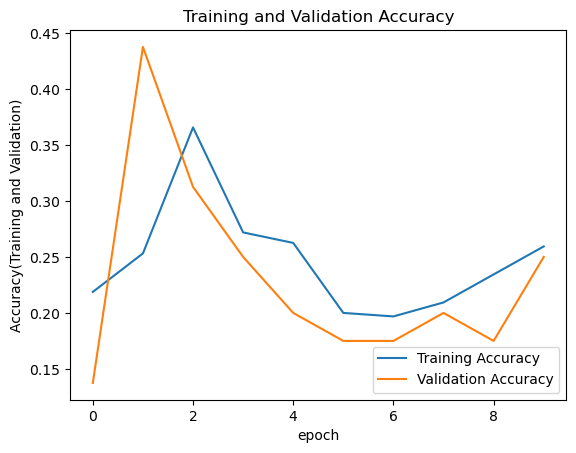

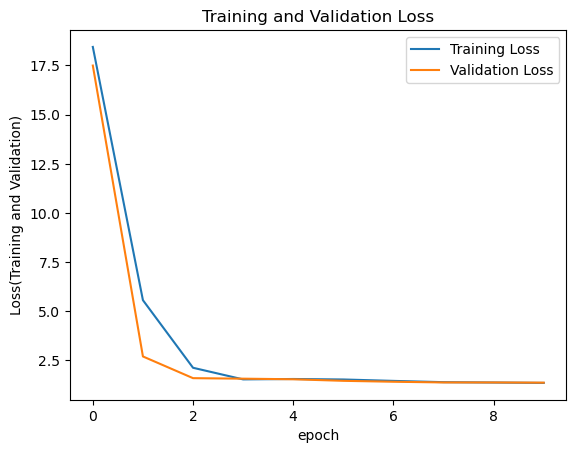

In [13]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history_base.history['accuracy'], label='Training Accuracy')
plt.plot(history_base.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.ylabel('Accuracy(Training and Validation)')
plt.xlabel('epoch')
plt.legend(loc='lower right')
#plt.legend(['Training'],['Validation'], loc='upper left')
plt.title('Training and Validation Accuracy')

#plt.legend(['Pretrained'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_base.history['loss'], label='Training Loss')
plt.plot(history_base.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.ylabel('Loss(Training and Validation)')
plt.xlabel('epoch')
#plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
#plt.legend(loc='upper right')
plt.legend(loc='upper right')
plt.show()


In [14]:
train_predictions = model_1.predict(X_train)
test_predictions = model_1.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

print("Train Data: "+str(accuracy_score(y_train.argmax(axis=-1), train_predictions.argmax(axis=-1))))
print("Test Data: "+str(accuracy_score(y_test.argmax(axis=-1), test_predictions.argmax(axis=-1))))

4/4 [==============================] - 0s 77ms/step
Train Data: 0.2475
Test Data: 0.28


## ResNet50

In [15]:
from keras.preprocessing.image import ImageDataGenerator

y_train = y_train.astype('int32')


data_gen = ImageDataGenerator(
    rotation_range=39,
    width_shift_range=0.16,
    height_shift_range=0.8,
    zoom_range=0.19,
    horizontal_flip=False,
    vertical_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator_1 = data_gen.flow(X_train, y_train, batch_size=batch_size, subset='training')
validation_generator_1 = data_gen.flow(X_train, y_train, batch_size=batch_size, subset='validation')



In [16]:
from keras.layers import BatchNormalization

#import inception with pre-trained weights. do not include fully #connected layers
resnet50 = applications.ResNet50(weights='imagenet', include_top=False)

# Unfreeze some layers of the ResNet50 model
for layer in resnet50.layers[-10:]:
    layer.trainable = True


# add a global spatial average pooling layer
x = resnet50.output
x = GlobalAveragePooling2D()(x)

# add a fully-connected layer
x = Dense(512, activation='relu')(x)

x = Dropout(0.5)(x)

x = BatchNormalization()(x)
x = Activation('relu')(x)

# and a fully connected output/classification layer
predictions = Dense(5, activation='softmax')(x)

# create the full network so we can train on it
resnet50 = Model(inputs=resnet50.input, outputs=predictions)

In [18]:
# Compile
resnet50.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [19]:
print(X_train.shape)
print(y_train.shape)

(400, 128, 128, 3)
(400, 5)


In [20]:
# history_resnet50 = resnet50.fit(X_train, y_train, epochs=10, shuffle = True, verbose = 1, validation_split=0.2)
history_resnet50 = resnet50.fit(train_generator_1, epochs=10, shuffle = True, verbose = 1, validation_data=validation_generator_1)


Epoch 1/10
4/4 [==============================] - 36s 7s/step - loss: 2.2827 - accuracy: 0.1656 - val_loss: 1.8158 - val_accuracy: 0.1750
Epoch 2/10
4/4 [==============================] - 25s 6s/step - loss: 2.2539 - accuracy: 0.1875 - val_loss: 1.7812 - val_accuracy: 0.1750
Epoch 3/10
4/4 [==============================] - 28s 7s/step - loss: 2.2297 - accuracy: 0.2000 - val_loss: 1.7367 - val_accuracy: 0.1750
Epoch 4/10
4/4 [==============================] - 26s 6s/step - loss: 2.3060 - accuracy: 0.1875 - val_loss: 1.7119 - val_accuracy: 0.1750
Epoch 5/10
4/4 [==============================] - 28s 7s/step - loss: 2.1506 - accuracy: 0.1969 - val_loss: 1.6959 - val_accuracy: 0.1750
Epoch 6/10
4/4 [==============================] - 27s 8s/step - loss: 2.2997 - accuracy: 0.1875 - val_loss: 1.7211 - val_accuracy: 0.1750
Epoch 7/10
4/4 [==============================] - 25s 6s/step - loss: 2.1937 - accuracy: 0.2188 - val_loss: 1.7190 - val_accuracy: 0.1750
Epoch 8/10
4/4 [==================

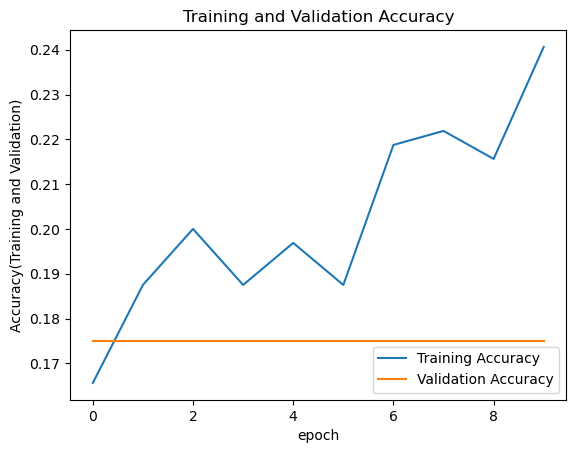

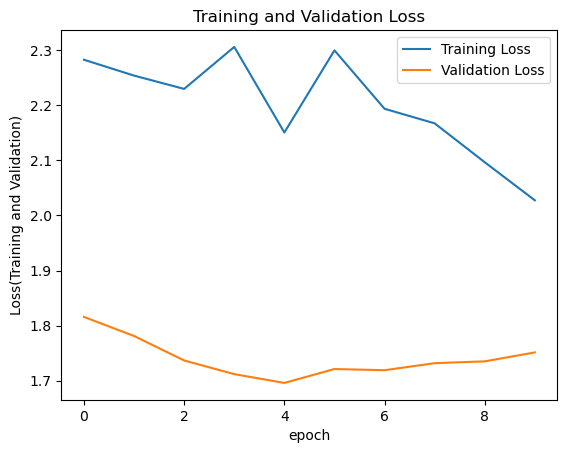

In [21]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history_resnet50.history['accuracy'], label='Training Accuracy')
plt.plot(history_resnet50.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.ylabel('Accuracy(Training and Validation)')
plt.xlabel('epoch')
plt.legend(loc='lower right')
#plt.legend(['Training'],['Validation'], loc='upper left')
plt.title('Training and Validation Accuracy')

#plt.legend(['Pretrained'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_resnet50.history['loss'], label='Training Loss')
plt.plot(history_resnet50.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.ylabel('Loss(Training and Validation)')
plt.xlabel('epoch')
#plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
#plt.legend(loc='upper right')
plt.legend(loc='upper right')
plt.show()

In [22]:
train_predictions = resnet50.predict(X_train)
test_predictions = resnet50.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

print("Train Data: "+str(accuracy_score(y_train.argmax(axis=-1), train_predictions.argmax(axis=-1))))
print("Test Data: "+str(accuracy_score(y_test.argmax(axis=-1), test_predictions.argmax(axis=-1))))

4/4 [==============================] - 2s 528ms/step
Train Data: 0.19
Test Data: 0.24


## ResNet50V2

In [23]:
from keras.preprocessing.image import ImageDataGenerator

y_train = y_train.astype('int32')


data_gen = ImageDataGenerator(
    rotation_range=65,
    width_shift_range=0.2,
    height_shift_range=0.15,
    zoom_range=0.4,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator_2 = data_gen.flow(X_train, y_train, batch_size=batch_size, subset='training')
validation_generator_2 = data_gen.flow(X_train, y_train, batch_size=batch_size, subset='validation')



In [24]:
from keras.layers import BatchNormalization

#import inception with pre-trained weights. do not include fully #connected layers
resnet50v2 = applications.ResNet50V2(weights='imagenet', include_top=False)

# Unfreeze some layers of the ResNet50 model
for layer in resnet50v2.layers[-5:]:
    layer.trainable = True


# add a global spatial average pooling layer
x = resnet50v2.output
x = GlobalAveragePooling2D()(x)

# add a fully-connected layer
x = Dense(512, activation='relu')(x)

x = Dropout(0.5)(x)

x = BatchNormalization()(x)
x = Activation('relu')(x)

# and a fully connected output/classification layer
predictions = Dense(5, activation='softmax')(x)

# create the full network so we can train on it
resnet50v2 = Model(inputs=resnet50v2.input, outputs=predictions)

In [25]:
# Compile
resnet50v2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(learning_rate=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [26]:
# # history_resnet50v2 = resnet50v2.fit(X_train, y_train, epochs=5, shuffle = True, verbose = 1, validation_split=0.2)
history_resnet50v2 = resnet50v2.fit(train_generator_2, epochs=10, shuffle = True, verbose = 1, validation_data=validation_generator_2)

# import math
# from keras.callbacks import ReduceLROnPlateau

# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# history_resnet50v2 = resnet50v2.fit(
#     train_generator,
#     steps_per_epoch=train_generator.n // train_generator.batch_size,
#     epochs=5,
#     validation_data=validation_generator,
#     validation_steps=math.ceil(validation_generator.n / validation_generator.batch_size),
#     callbacks=[reduce_lr])



Epoch 1/10
4/4 [==============================] - 32s 6s/step - loss: 2.1519 - accuracy: 0.1688 - val_loss: 2.0594 - val_accuracy: 0.1750
Epoch 2/10
4/4 [==============================] - 26s 6s/step - loss: 2.0050 - accuracy: 0.2031 - val_loss: 2.0950 - val_accuracy: 0.1500
Epoch 3/10
4/4 [==============================] - 26s 6s/step - loss: 2.0844 - accuracy: 0.2031 - val_loss: 2.0355 - val_accuracy: 0.2125
Epoch 4/10
4/4 [==============================] - 27s 6s/step - loss: 2.0191 - accuracy: 0.2156 - val_loss: 2.0207 - val_accuracy: 0.2000
Epoch 5/10
4/4 [==============================] - 27s 6s/step - loss: 2.0781 - accuracy: 0.2031 - val_loss: 1.9127 - val_accuracy: 0.1875
Epoch 6/10
4/4 [==============================] - 28s 9s/step - loss: 2.0452 - accuracy: 0.2281 - val_loss: 1.9765 - val_accuracy: 0.2375
Epoch 7/10
4/4 [==============================] - 24s 8s/step - loss: 2.0449 - accuracy: 0.2219 - val_loss: 2.1885 - val_accuracy: 0.2125
Epoch 8/10
4/4 [==================

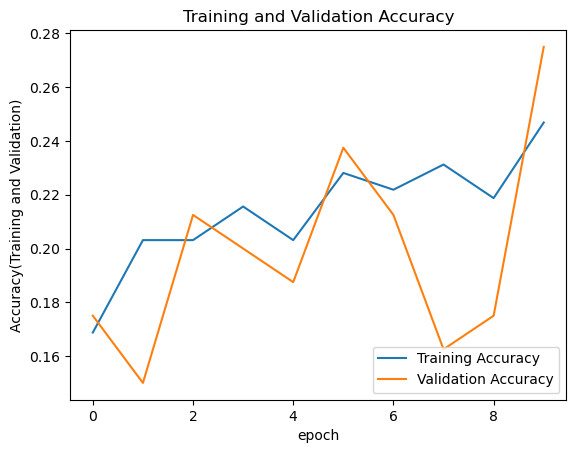

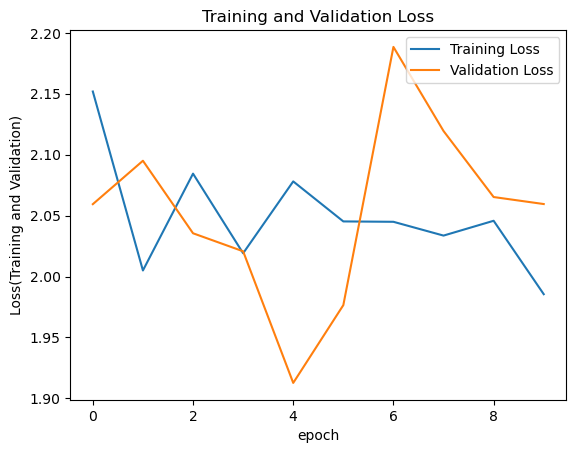

In [27]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history_resnet50v2.history['accuracy'], label='Training Accuracy')
plt.plot(history_resnet50v2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.ylabel('Accuracy(Training and Validation)')
plt.xlabel('epoch')
plt.legend(loc='lower right')
#plt.legend(['Training'],['Validation'], loc='upper left')
plt.title('Training and Validation Accuracy')

#plt.legend(['Pretrained'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_resnet50v2.history['loss'], label='Training Loss')
plt.plot(history_resnet50v2.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.ylabel('Loss(Training and Validation)')
plt.xlabel('epoch')
#plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
#plt.legend(loc='upper right')
plt.legend(loc='upper right')
plt.show()

In [28]:
train_predictions = resnet50v2.predict(X_train)
test_predictions = resnet50v2.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

print("Train Data: "+str(accuracy_score(y_train.argmax(axis=-1), train_predictions.argmax(axis=-1))))
print("Test Data: "+str(accuracy_score(y_test.argmax(axis=-1), test_predictions.argmax(axis=-1))))

4/4 [==============================] - 2s 377ms/step
Train Data: 0.2175
Test Data: 0.31


In [ ]:
# Save the Model
resnet50.save("D:/FYP/Phaedra_BE/resnet502.h5")